In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Day1

### EDA End to End

1. Problem Statement - Defines the pain area of the business and theb probable factors and the probable factors driving it.

2. Hypothesis Formation -

3. Univariate analysis - 
* Numerical Columns - histogram/distplot, boxplot
* Categorical Variables - piechart,countplot,frequency plot

4. Bivariate Analysis - Analysis more than 1 columns.

* Num vs Num - Scatter plot
* Cat vs Num - Boxplot, Violin plot
* cat vs cat - contigency table

5. Missing values

6. Outlier Analysis & its removal

7. Feature Engeeniring

8. Transformation and scaling aka Data Preprocessing Step

In [2]:
sales=pd.read_csv('k_circle_sales.csv')
sales.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3


In [3]:
sales.shape

(8523, 13)

In [4]:
sales.ndim

2

In [5]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.776851,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,2009.000000,13086.964800,24.000000


C:\Users\Pragyansh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


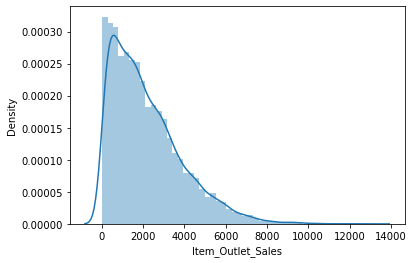

In [6]:
sns.distplot(sales.Item_Outlet_Sales)
plt.show()

C:\Users\Pragyansh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

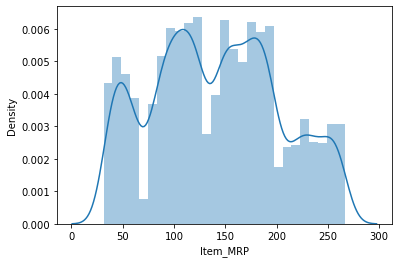

In [7]:
sns.distplot(sales.Item_MRP)

In [8]:
sales.skew()

Item_Weight                 -0.352215
Item_Visibility              1.167091
Item_MRP                     0.127390
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
Profit                      -3.379808
dtype: float64

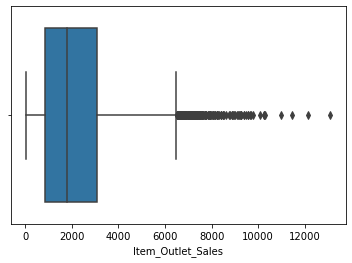

In [9]:
sns.boxplot(x=sales.Item_Outlet_Sales)
plt.show()

C:\Users\Pragyansh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

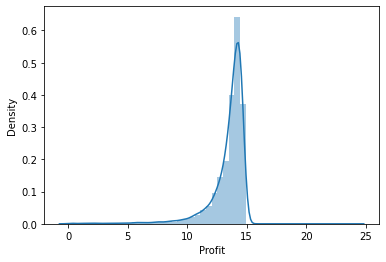

In [10]:
sns.distplot(sales.Profit)

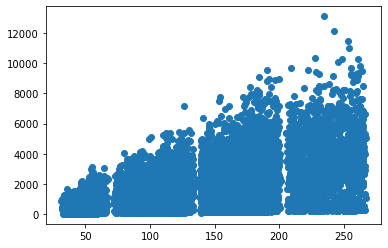

In [11]:
plt.scatter(x=sales.Item_MRP,y=sales.Item_Outlet_Sales)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

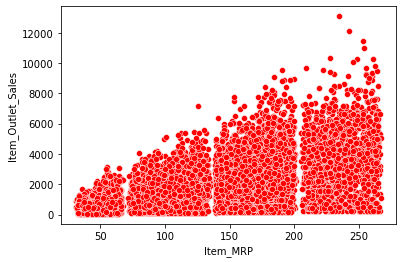

In [12]:
sns.scatterplot(x=sales.Item_MRP,y=sales.Item_Outlet_Sales,color='red')

<AxesSubplot:xlabel='Profit'>

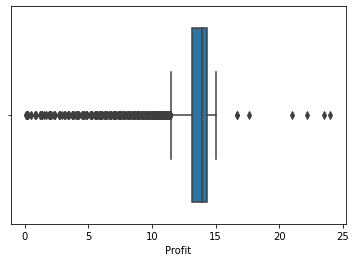

In [13]:
sns.boxplot(x=sales.Profit)

<AxesSubplot:xlabel='Item_MRP'>

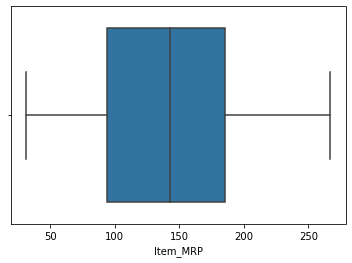

In [14]:
sns.boxplot(x=sales.Item_MRP)

In [15]:
np.quantile(sales.Item_Outlet_Sales,0.25)

834.2474

In [16]:
np.quantile(sales.Item_Outlet_Sales,0.75)

3101.2964

In [17]:
np.quantile(sales.Item_Outlet_Sales,0.50)

1794.3310000000001

In [18]:
max(sales.Item_Outlet_Sales)

13086.9648

In [19]:
sales.Item_Outlet_Sales.quantile(0.25)

834.2474

In [20]:
sales.mean()

Item_Weight                    11.676740
Item_Visibility                 0.066132
Item_MRP                      140.998838
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
Profit                         13.414514
dtype: float64

In [21]:
sales.median()

Item_Weight                    11.800000
Item_Visibility                 0.053931
Item_MRP                      142.700000
Outlet_Establishment_Year    1999.000000
Item_Outlet_Sales            1794.331000
Profit                         13.900000
dtype: float64

In [22]:
sales.var()

Item_Weight                  3.337201e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.876071e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
Profit                       2.896258e+00
dtype: float64

In [23]:
sales.std()

Item_Weight                     5.776851
Item_Visibility                 0.051598
Item_MRP                       62.258099
Outlet_Establishment_Year       8.371760
Item_Outlet_Sales            1706.499616
Profit                          1.701840
dtype: float64

### Covarince and Corelation


In [24]:
sales.loc[:,['Item_Outlet_Sales','Item_MRP']].corr()

,Item_Outlet_Sales,Item_MRP
Item_Outlet_Sales,1.000000,0.567555
Item_MRP,0.567555,1.000000


In [25]:
sales[['Item_Visibility','Item_Outlet_Sales']].corr()

,Item_Visibility,Item_Outlet_Sales
Item_Visibility,1.000000,-0.128625
Item_Outlet_Sales,-0.128625,1.000000


In [26]:
sales.Item_MRP.corr(sales.Item_Outlet_Sales)

0.567555195254739

In [27]:
# Covariance
np.cov(sales.Item_MRP,sales.Item_Outlet_Sales)

array([[   3876.07088459,   60299.00607842],
       [  60299.00607842, 2912140.93849972]])

<AxesSubplot:>

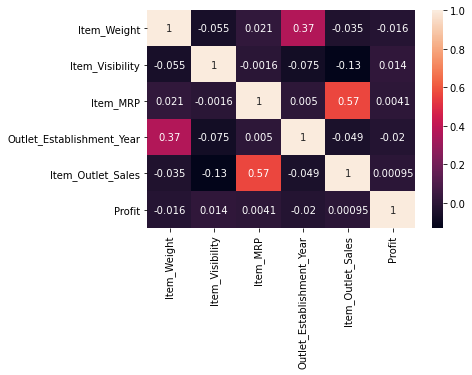

In [28]:
sns.heatmap(sales.corr(),annot=True)

In [29]:
sales.cov()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
Item_Weight,33.372008,-0.016030,7.425851,16.293339,-3.295708e+02,-0.160196
Item_Visibility,-0.016030,0.002662,-0.005131,-0.032325,-1.132561e+01,0.001253
Item_MRP,7.425851,-0.005131,3876.070885,2.629821,6.029901e+04,0.435364
Outlet_Establishment_Year,16.293339,-0.032325,2.629821,70.086372,-7.019621e+02,-0.280298
Item_Outlet_Sales,-329.570782,-11.325611,60299.006078,-701.962133,2.912141e+06,2.762921
Profit,-0.160196,0.001253,0.435364,-0.280298,2.762921e+00,2.896258


<AxesSubplot:>

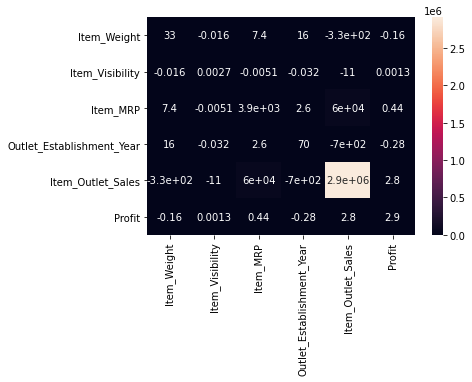

In [30]:
sns.heatmap(sales.cov(),annot=True)

<AxesSubplot:>

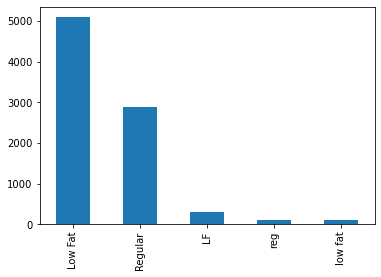

In [31]:
sales.Item_Fat_Content.value_counts().plot(kind='bar')

In [32]:
# Replacing the values

sales.Item_Fat_Content.replace({'low fat':'Low Fat',
                               'reg':'Regular',
                               'LF':'Low Fat'},inplace=True)

In [33]:
sales.Item_Fat_Content

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

<AxesSubplot:>

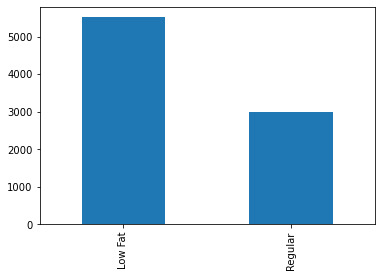

In [34]:
sales.Item_Fat_Content.value_counts().plot(kind='bar')

<AxesSubplot:>

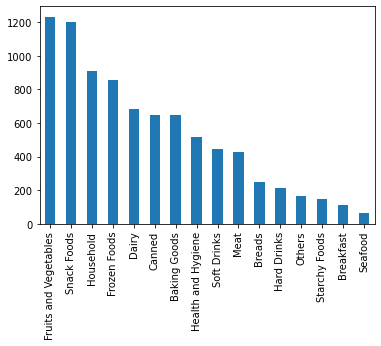

In [35]:
# Item Type

sales.Item_Type.value_counts().plot(kind='bar')

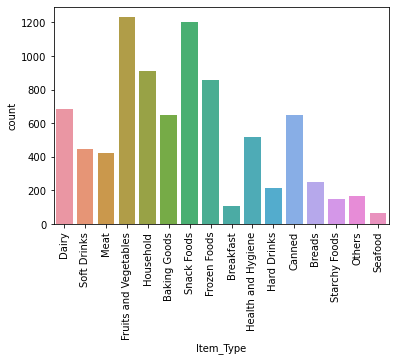

In [36]:
sns.countplot(x=sales.Item_Type)
plt.xticks(rotation=90)
plt.show()

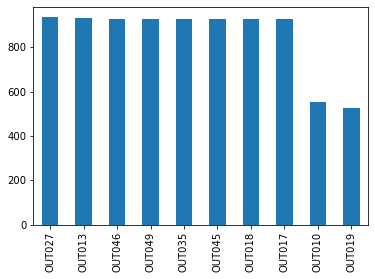

In [37]:
sales.Outlet_Identifier.value_counts().plot(kind='bar')
plt.show()

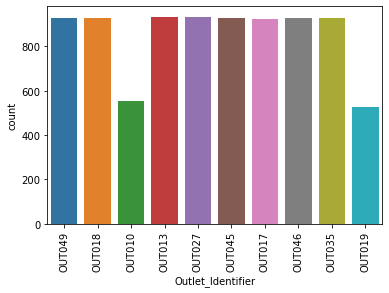

In [38]:
sns.countplot(x=sales.Outlet_Identifier)
plt.xticks(rotation=90)
plt.show()

In [39]:
sales.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [40]:
sales.Outlet_Location_Type.value_counts()

Tier 2    2793
Tier1     2388
Tier 3     932
?          120
  --       109
  -         67
na          48
NAN         16
Name: Outlet_Location_Type, dtype: int64

### Summary of univariate analysis

1. Average sales comes to be 2181 Dollars.
2. The top 5 products sold by store are fruits and veggies, snackc food, frozen food, dairy, household.
3. The maximum outlets opened are Out027 and min are OUT19 and OUT10.
4. Most of items that are sold in the store are low fat items.
5. Most of outlets are in Tier 2 Location and mostly they are Stype 01.

# DAY 2

### Bivariate Analysis

**num vs num**

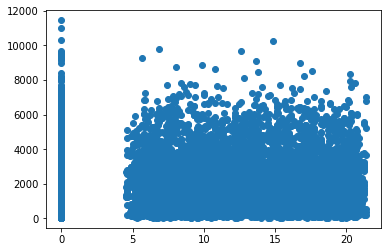

<Figure size 720x576 with 0 Axes>

In [41]:
plt.scatter(sales.Item_Weight, sales.Item_Outlet_Sales)
plt.figure(figsize=[10,8])
plt.show()

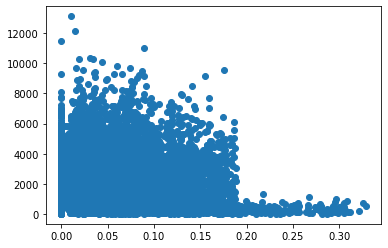

<Figure size 720x576 with 0 Axes>

In [42]:
plt.scatter(sales.Item_Visibility, sales.Item_Outlet_Sales)
plt.figure(figsize=[10,8])
plt.show()

**Item visibility has some null values**

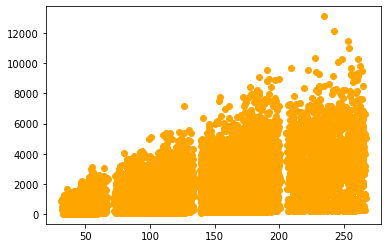

<Figure size 720x576 with 0 Axes>

In [43]:
plt.scatter(sales.Item_MRP, sales.Item_Outlet_Sales, color='orange')
plt.figure(figsize=[10,8])
plt.show()

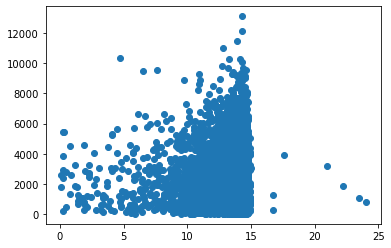

<Figure size 720x576 with 0 Axes>

In [44]:
plt.scatter(sales.Profit,sales.Item_Outlet_Sales)
plt.figure(figsize=[10,8])
plt.show()

### Bivariate Analysis
**Cat vs Num**

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

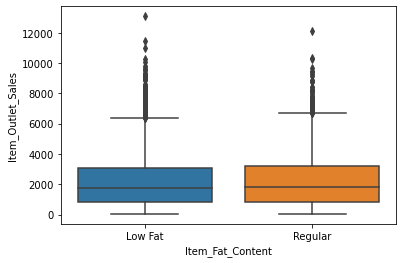

In [45]:
sns.boxplot(x=sales.Item_Fat_Content, y=sales.Item_Outlet_Sales)

In [46]:
# Generating summary stats of boxplot above

sales.groupby('Item_Fat_Content')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Fat_Content,,,,,,,,
Low Fat,5517.0,2157.711534,1697.973824,33.2900,826.2578,1765.0358,3050.69560,13086.9648
Regular,3006.0,2224.561170,1721.480865,33.9558,857.5504,1844.5989,3198.66965,12117.5600


In [47]:
sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Profit'],
      dtype='object')

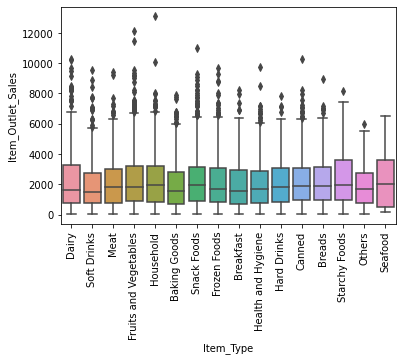

In [48]:
sns.boxplot(x=sales.Item_Type, y=sales.Item_Outlet_Sales)
plt.xticks(rotation=90)
plt.show()

In [49]:
sales.groupby('Item_Type')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,648.0,1952.971207,1546.788045,37.2848,705.08220,1577.9460,2823.82425,7931.6754
Breads,251.0,2204.132226,1644.235914,35.2874,968.73900,1860.2452,3145.90500,8958.3390
Breakfast,110.0,2111.808651,1911.693586,39.9480,679.11600,1554.6430,2970.30025,8209.3140
Canned,649.0,2225.194904,1645.235638,37.9506,952.09400,1860.2452,3101.29640,10306.5840
Dairy,682.0,2232.542597,1884.404698,40.6138,788.97300,1650.8511,3296.20935,10256.6490
Frozen Foods,856.0,2132.867744,1724.777720,36.6190,808.94700,1687.1372,3079.49145,9678.0688
Fruits and Vegetables,1232.0,2289.009592,1799.503459,45.2744,884.84820,1830.9500,3227.13260,12117.5600
Hard Drinks,214.0,2139.221622,1606.191587,37.9506,834.91320,1816.6353,3071.33540,7843.1240
Health and Hygiene,520.0,2010.000265,1553.633063,34.6216,758.84555,1669.4935,2884.57850,9779.9362


In [50]:
sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Profit'],
      dtype='object')

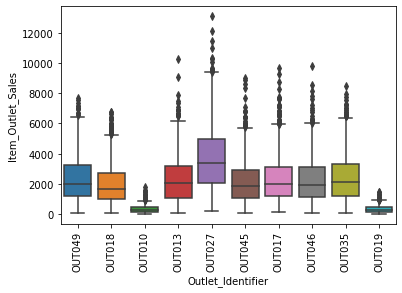

In [51]:
sns.boxplot(x=sales.Outlet_Identifier, y=sales.Item_Outlet_Sales)
plt.xticks(rotation=90)
plt.show()

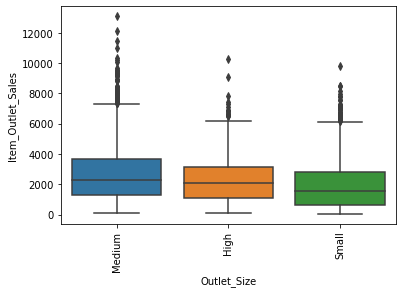

In [52]:
sns.boxplot(x=sales.Outlet_Size, y=sales.Item_Outlet_Sales)
plt.xticks(rotation=90)
plt.show()

In [53]:
sales.loc[sales.Outlet_Identifier=='OUT027','Outlet_Size'].value_counts()

Medium    935
Name: Outlet_Size, dtype: int64

In [54]:
sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Profit'],
      dtype='object')

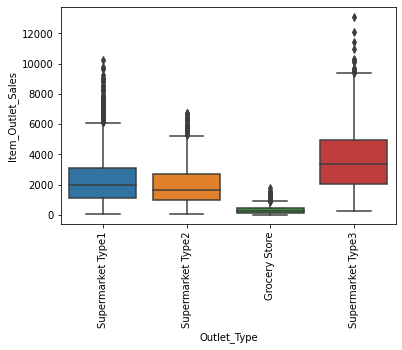

In [55]:
sns.boxplot(x=sales.Outlet_Type, y=sales.Item_Outlet_Sales)
plt.xticks(rotation=90)
plt.show()

In [56]:
sales.groupby("Outlet_Type")['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Type,,,,,,,,
Grocery Store,1083.0,339.828500,260.851582,33.2900,153.79980,256.9988,458.73620,1775.6886
Supermarket Type1,5577.0,2316.181148,1515.965558,73.2380,1151.16820,1990.7420,3135.91800,10256.6490
Supermarket Type2,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
Supermarket Type3,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648


## Summary

* S3 has highest sales.
* out027 Medium Size Outlet has very high sales
* outlet Location Type has missing value
* OUT027 is a S3 Outlet
* Low fat content have higher sales in comparison to regular one.
* Item_Type - Household,Dairy,Fruits and Veggis, Starchy Food, Frozen Food etc have quit higher sales.
* Seafood has no Outlier in sales and just because the price is higher and thus, it reflect high score.
* Generally, Medium Size Outlets have a very high scales.
* Item Visibility and Item Weight have missing values.
* Item MRP shows a high cluster of values which are centered at 25 dollars, 100 and 250 dollars approximately.

## Missing Values

* Numerical Values - Median Imputation is the best bet possible.
* Categorical Variable - Mode Imputation is good.

**Missing value imputaion basis pattern identification**

However, the best way ti deal with the missing values is to look into data and find out the optimal pattern that can be
leveraged to impute the missing values.

In [57]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [58]:
sales.groupby('Item_Type')['Item_Weight'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,587.0,11.210443,5.725596,0.0,7.2200,10.8000,15.550,20.85
Breads,227.0,10.197247,5.430212,0.0,6.5500,10.1950,14.500,20.85
Breakfast,103.0,11.032718,6.421345,0.0,7.8800,9.0000,16.500,21.10
Canned,589.0,11.261078,5.570581,0.0,7.5000,11.1000,15.850,21.35
Dairy,620.0,12.256702,5.865431,0.0,7.9350,12.9500,17.250,20.70
Frozen Foods,781.0,11.829129,5.564991,0.0,7.9300,12.1500,16.200,20.85
Fruits and Vegetables,1127.0,11.957445,5.838902,0.0,7.7525,12.5000,16.600,21.35
Hard Drinks,194.0,10.753918,4.892196,0.0,8.0600,9.5000,14.700,19.70
Health and Hygiene,476.0,11.872258,5.787862,0.0,8.4200,11.6000,16.750,21.25


In [59]:
sales.Item_Weight

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [60]:
rownos= sales.loc[sales.Item_Weight.isnull(),].index
ids = sales.loc[sales.Item_Weight.isnull(),]['Item_Identifier']

In [61]:
rownos, ids

(Int64Index([   7,   18,   21,   23,   29,  136,  153,  161,  168,  178,
             ...
             8372, 8373, 8375, 8383, 8390, 8404, 8405, 8422, 8435, 8442],
            dtype='int64', length=749),
 7       FDP10
 18      DRI11
 21      FDW12
 23      FDC37
 29      FDC14
         ...  
 8404    DRH39
 8405    FDB09
 8422    FDD08
 8435    FDT48
 8442    FDX40
 Name: Item_Identifier, Length: 749, dtype: object)

In [62]:
for i in rownos:
    sales.loc[i,'Item_Weight']=sales.loc[sales.Item_Identifier==ids[i],'Item_Weight'].mean()

In [63]:
pd.DataFrame(sales.groupby("Outlet_Size")["Outlet_Type"].value_counts())

Outlet_Type
Outlet_Size Outlet_Type                   
High        Supermarket Type1          932
Medium      Supermarket Type3          935
            Supermarket Type1          930
            Supermarket Type2          928
Small       Supermarket Type1         1860
            Grocery Store              528

In [64]:
sales.Outlet_Size.mode()

0    Medium
dtype: object

In [65]:
sales.loc[sales.Outlet_Size.isnull(),'Outlet_Type'].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [66]:
sales.loc[sales.Outlet_Type=='Supermarket Type1','Outlet_Identifier'].value_counts()

OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT017    926
Name: Outlet_Identifier, dtype: int64

In [67]:
sales.loc[sales.Outlet_Type=='Supermarket Type1',['Outlet_Identifier','Outlet_Size']].value_counts()

Outlet_Identifier  Outlet_Size
OUT013             High           932
OUT049             Medium         930
OUT046             Small          930
OUT035             Small          930
dtype: int64

In [68]:
sales.loc[sales.Outlet_Size.isnull(), 'Outlet_Size']='Small'

In [69]:
sales.loc[sales["Item_Weight"].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0,OUT027,1985,Medium,Tier 2,Supermarket Type3,4434.2280,14.5
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2,OUT019,1985,Small,Tier1,Grocery Store,120.5098,12.3


In [70]:
sales.groupby("Item_Type").mean()['Item_Weight']

Item_Type
Baking Goods             11.274961
Breads                   10.185237
Breakfast                11.071583
Canned                   11.366399
Dairy                    12.327054
Frozen Foods             11.877524
Fruits and Vegetables    11.989753
Hard Drinks              10.797767
Health and Hygiene       11.906371
Household                12.161019
Meat                     11.375251
Others                   12.595148
Seafood                  11.682743
Snack Foods              11.788654
Soft Drinks              11.046050
Starchy Foods            12.784875
Name: Item_Weight, dtype: float64

In [71]:
sales.loc[sales["Item_Identifier"]=="FDK57","Item_Weight"]=sales.loc[sales["Item_Type"]=="Snack Foods","Item_Weight"].mean()

In [72]:
sales.loc[sales['Item_Identifier']=="FDQ60",'Item_Weight']=sales.loc[sales["Item_Type"]=='Baking Goods','Item_Weight'].mean()

In [73]:
sales.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.138,11.5


# Day3

## Feature Engineering

In [74]:
pd.get_dummies(sales).head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,...,Outlet_Location_Type_?,Outlet_Location_Type_NAN,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier1,Outlet_Location_Type_na,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8,1999,3735.1380,11.5,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,5.92,0.019278,48.3,2009,443.4228,14.3,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,17.50,0.016760,141.6,1999,2097.2700,14.5,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,19.20,0.000000,182.1,1998,732.3800,13.6,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0.000000,53.9,1987,994.7052,14.1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [75]:
sales.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [76]:
perishable=['Dairy', 'Meat', 'Fruits and Vegetables',
        'Frozen Foods','Breakfast','Breads', 'Seafood']

In [77]:
def perish(x):
    if x in perishable:
        return('Perishables')
    else:
        return('Non-Perishables')

In [78]:
pd.get_dummies(sales.Item_Type.apply(perish))

,Non-Perishables,Perishables
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
8518,1,0
8519,1,0
8520,1,0
8521,1,0


In [79]:
sales['Item_TypeBinned'] = sales.Item_Type.apply(perish)

In [80]:
sales.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_TypeBinned
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,Perishables
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,Non-Perishables
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,Perishables
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Small,NaN,Grocery Store,732.3800,13.6,Perishables
4,NCD19,8.930,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,Non-Perishables
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4,OUT018,2009,Medium,Tier 2,Supermarket Type2,556.6088,9.5,Non-Perishables
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.7,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,8.8,Non-Perishables
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.8,OUT027,1985,Medium,Tier 2,Supermarket Type3,4022.7636,13.3,Non-Perishables
8,FDH17,16.200,Regular,0.016687,Frozen Foods,97.0,OUT045,2002,Small,NaN,Supermarket Type1,1076.5986,13.0,Perishables
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8,OUT017,2007,Small,--,Supermarket Type1,4710.5350,13.6,Perishables


In [81]:
sales.Item_Identifier[0][:2]

'FD'

In [82]:
ids=[]

for i in sales.Item_Identifier:
    ids.append(i[:2])

In [83]:
ids

['FD',
 'DR',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'DR',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'NC',
 'FD',
 'DR',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'DR',
 'NC',
 'FD',
 'DR',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'NC',
 'DR',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'NC',
 'FD',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'DR',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'DR',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'FD',
 'NC',
 'DR',
 'FD',
 'FD',
 'FD',
 'FD',
 'DR',
 'FD',
 'DR',
 'NC',
 'FD',
 'NC',
 'NC',
 'FD',
 'FD',
 'NC',
 'FD',
 'FD',
 'FD',
 'NC',
 'NC',
 'NC',
 'NC',

In [84]:
sales['Item_Ids']= pd.Series(ids)

In [85]:
sales.groupby('Item_Ids').count()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_TypeBinned
Item_Ids,,,,,,,,,,,,,,
DR,799,799,799,799,799,799,799,799,799,601,799,799,799,799
FD,6125,6125,6125,6125,6125,6125,6125,6125,6125,4651,6125,6125,6125,6125
NC,1599,1599,1599,1599,1599,1599,1599,1599,1599,1221,1599,1599,1599,1599


In [86]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_TypeBinned,Item_Ids
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,Perishables,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,Non-Perishables,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,Perishables,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Small,NaN,Grocery Store,732.3800,13.6,Perishables,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,Non-Perishables,NC


In [87]:
sales.loc[sales['Item_Ids']=="NC",'Item_Fat_Content']='Non Edible'

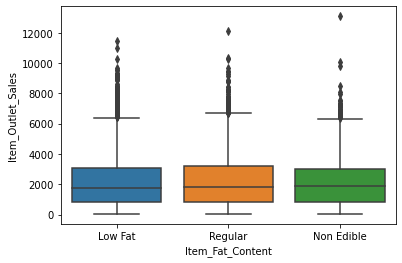

In [88]:
sns.boxplot(x=sales.Item_Fat_Content, y=sales.Item_Outlet_Sales)
plt.show()

In [89]:
sales.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_TypeBinned,Item_Ids
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,Perishables,FD
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,Non-Perishables,DR
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,Perishables,FD
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Small,NaN,Grocery Store,732.3800,13.6,Perishables,FD
4,NCD19,8.930,Non Edible,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,Non-Perishables,NC
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4,OUT018,2009,Medium,Tier 2,Supermarket Type2,556.6088,9.5,Non-Perishables,FD
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.7,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,8.8,Non-Perishables,FD
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.8,OUT027,1985,Medium,Tier 2,Supermarket Type3,4022.7636,13.3,Non-Perishables,FD
8,FDH17,16.200,Regular,0.016687,Frozen Foods,97.0,OUT045,2002,Small,NaN,Supermarket Type1,1076.5986,13.0,Perishables,FD
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8,OUT017,2007,Small,--,Supermarket Type1,4710.5350,13.6,Perishables,FD


In [90]:
sales.loc[sales['Outlet_Identifier']!="OUT027",'Outlet_Identifier']="Others"

In [91]:
sales.Outlet_Identifier.value_counts()

Others    7588
OUT027     935
Name: Outlet_Identifier, dtype: int64

In [92]:
sales["Outlet_Age"]=2013-sales["Outlet_Establishment_Year"]

In [93]:
sales.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_TypeBinned,Item_Ids,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8,Others,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,Perishables,FD,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.3,Others,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,Non-Perishables,DR,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6,Others,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,Perishables,FD,14
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.1,Others,1998,Small,NaN,Grocery Store,732.3800,13.6,Perishables,FD,15
4,NCD19,8.930,Non Edible,0.000000,Household,53.9,Others,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,Non-Perishables,NC,26
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4,Others,2009,Medium,Tier 2,Supermarket Type2,556.6088,9.5,Non-Perishables,FD,4
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.7,Others,1987,High,Tier 3,Supermarket Type1,343.5528,8.8,Non-Perishables,FD,26
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.8,OUT027,1985,Medium,Tier 2,Supermarket Type3,4022.7636,13.3,Non-Perishables,FD,28
8,FDH17,16.200,Regular,0.016687,Frozen Foods,97.0,Others,2002,Small,NaN,Supermarket Type1,1076.5986,13.0,Perishables,FD,11
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8,Others,2007,Small,--,Supermarket Type1,4710.5350,13.6,Perishables,FD,6


In [94]:
finalsales=sales.drop(["Item_Identifier","Item_Type",
                      "Outlet_Establishment_Year"],axis=1)

In [95]:
finalsales.shape

(8523, 13)

In [96]:
pd.get_dummies(finalsales).shape

(8523, 31)

In [97]:
sales.shape

(8523, 16)

In [98]:
val= finalsales.Outlet_Location_Type.mode()

In [99]:
val


0    Tier 2
dtype: object

In [100]:
finalsales['Outlet_Location_Type']=finalsales.Outlet_Location_Type.fillna(value='Tier 2')

In [101]:
finalsales.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Profit                  0
Item_TypeBinned         0
Item_Ids                0
Outlet_Age              0
dtype: int64

In [102]:
finalsales

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_TypeBinned,Item_Ids,Outlet_Age
0,9.300,Low Fat,0.016047,249.8,Others,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,Perishables,FD,14
1,5.920,Regular,0.019278,48.3,Others,Medium,Tier 2,Supermarket Type2,443.4228,14.3,Non-Perishables,DR,4
2,17.500,Low Fat,0.016760,141.6,Others,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,Perishables,FD,14
3,19.200,Regular,0.000000,182.1,Others,Small,Tier 2,Grocery Store,732.3800,13.6,Perishables,FD,15
4,8.930,Non Edible,0.000000,53.9,Others,High,Tier 3,Supermarket Type1,994.7052,14.1,Non-Perishables,NC,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,214.5,Others,High,Tier 3,Supermarket Type1,2778.3834,14.1,Non-Perishables,FD,26
8519,8.380,Regular,0.046982,108.2,Others,Small,Tier 2,Supermarket Type1,549.2850,14.2,Non-Perishables,FD,11
8520,10.600,Non Edible,0.035186,85.1,Others,Small,Tier1,Supermarket Type1,1193.1136,9.5,Non-Perishables,NC,9
8521,7.210,Regular,0.145221,103.1,Others,Medium,Tier 2,Supermarket Type2,1845.5976,14.2,Non-Perishables,FD,4


In [103]:
marks=pd.DataFrame({'Marks':[98,88,65,33,99,74,81,55,68,48]})

In [104]:
marks

,Marks
0,98
1,88
2,65
3,33
4,99
5,74
6,81
7,55
8,68
9,48


In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
sc = StandardScaler()

In [107]:
pd.DataFrame(sc.fit_transform(marks)).describe()

,0
count,1.000000e+01
mean,-2.664535e-16
std,1.054093e+00
min,-1.852664e+00
25%,-6.550316e-01
50%,4.888296e-03
75%,7.503534e-01
max,1.373611e+00


In [108]:
sc.fit(marks)

StandardScaler()

In [109]:
sc.transform(marks)

array([[ 1.3247281 ],
       [ 0.83589854],
       [-0.28840944],
       [-1.85266402],
       [ 1.37361106],
       [ 0.15153716],
       [ 0.49371785],
       [-0.777239  ],
       [-0.14176057],
       [-1.11941969]])

In [110]:
trf=sc.transform(marks)

In [111]:
trf

array([[ 1.3247281 ],
       [ 0.83589854],
       [-0.28840944],
       [-1.85266402],
       [ 1.37361106],
       [ 0.15153716],
       [ 0.49371785],
       [-0.777239  ],
       [-0.14176057],
       [-1.11941969]])

In [112]:
sc.inverse_transform(trf)

array([[98.],
       [88.],
       [65.],
       [33.],
       [99.],
       [74.],
       [81.],
       [55.],
       [68.],
       [48.]])

In [113]:
colnames= finalsales.dtypes[finalsales.dtypes == 'float64'].index

In [114]:
pd.DataFrame(sc.fit_transform(finalsales[colnames]),columns=[colnames])

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
0,-0.428795,-0.970732,1.747685,0.910601,-1.125033
1,-1.023460,-0.908111,-1.489032,-1.018440,0.520342
2,1.013884,-0.956917,0.009657,-0.049238,0.637869
3,1.312976,-1.281758,0.660212,-0.849103,0.108998
4,-0.493891,-1.281758,-1.399078,-0.695373,0.402815
...,...,...,...,...,...
8518,-0.857200,-0.181193,1.180657,0.349915,0.402815
8519,-0.590656,-0.371154,-0.526851,-0.956402,0.461578
8520,-0.200078,-0.599784,-0.897909,-0.579100,-2.300301
8521,-0.796502,1.532880,-0.608773,-0.196725,0.461578


In [115]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [116]:
pd.DataFrame(minmax.fit_transform(marks)).describe()

,0
count,10.000000
mean,0.574242
std,0.326721
min,0.000000
25%,0.371212
50%,0.575758
75%,0.806818
max,1.000000


## Transformation

**1. Log Transformation**

**2 Exponential Transformation**

**3. BoxCox Transformation**

**4. Prob Plot to Cross Verify**

In [117]:
# Applying log transformation on Item Outlet Sales
print('Skewnes before transform ',finalsales.Item_Outlet_Sales.skew())

Skewnes before transform  1.1775306028542798


In [118]:
# Log Transform
logtransform=np.log(finalsales.Item_Outlet_Sales)
print('Log transform skew ',pd.DataFrame(logtransform).skew())

Log transform skew  Item_Outlet_Sales   -0.887753
dtype: float64


In [119]:
from scipy.stats import probplot

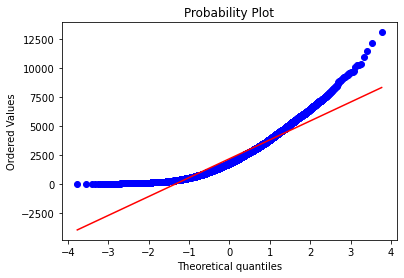

In [120]:
probplot(finalsales.Item_Outlet_Sales, plot= plt)
plt.show()

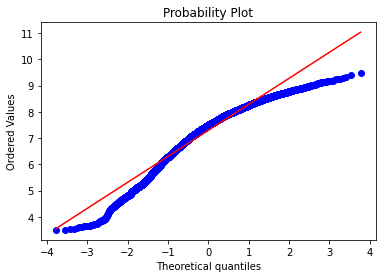

In [121]:
probplot(logtransform, plot= plt)
plt.show()

C:\Users\Pragyansh\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Pragyansh\anaconda3\lib\site-packages\numpy\lib\function_base.py:2474: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\Pragyansh\anaconda3\lib\site-packages\matplotlib\ticker.py:2234: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


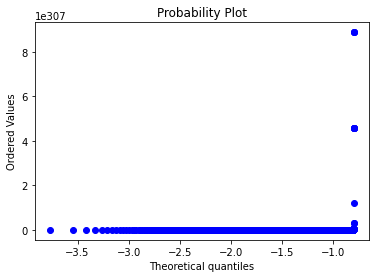

In [122]:
exptransform=np.exp(finalsales.Item_Outlet_Sales)
probplot(exptransform, plot= plt)
plt.show()

In [123]:

from scipy.stats import boxcox

In [124]:
tgt, vals=boxcox(finalsales.Item_Outlet_Sales)

In [125]:
pd.DataFrame(tgt).skew()

0   -0.074978
dtype: float64

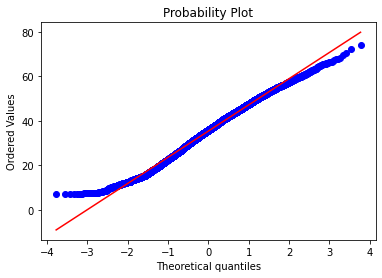

In [126]:
probplot(tgt,plot=plt)
plt.show()

# Day4

## Outliers 

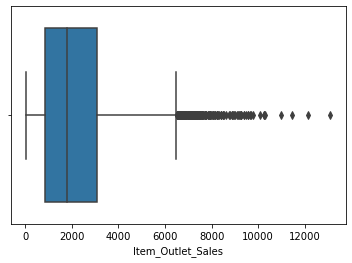

In [129]:
sns.boxplot(x=finalsales.Item_Outlet_Sales)
plt.show()

In [141]:
# Calc Quantiles
q1= np.quantile(finalsales.Item_Outlet_Sales, 0.25)
q3= np.quantile(finalsales.Item_Outlet_Sales, 0.75)

# Inter Quantile Range
iqr= q3-q1

# Rule - Outlier is any value greater than Q3+1.5*IQR
# Rule - Inlier is any value greater than Q3-1.5*IQR

In [145]:
finalsales[finalsales.Item_Outlet_Sales>q3+1.5*iqr].shape[0]

186

In [148]:
# Extracting the daataframe with sales having no outliers
wt_outliers= finalsales[~(finalsales.Item_Outlet_Sales>q3+1.5*iqr)]

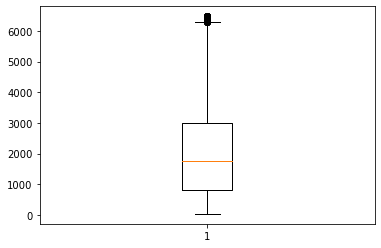

In [149]:
plt.boxplot(wt_outliers.Item_Outlet_Sales)
plt.show()

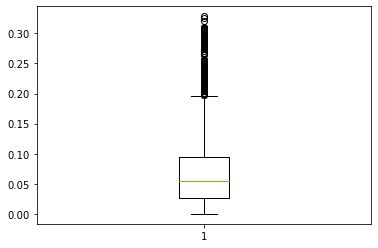

In [150]:
plt.boxplot(wt_outliers.Item_Visibility)
plt.show()

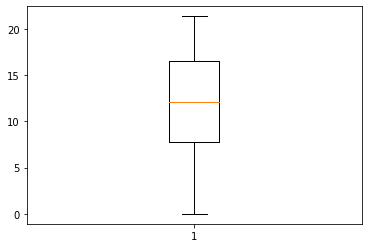

In [151]:
plt.boxplot(wt_outliers.Item_Weight)
plt.show()

In [157]:
Q1=np.quantile(wt_outliers.Item_Visibility,0.25)
Q3=np.quantile(wt_outliers.Item_Visibility,0.75)

IQR=Q3-Q1

wt_outliers=wt_outliers[~(wt_outliers.Item_Visibility>Q3+1.5*IQR)]

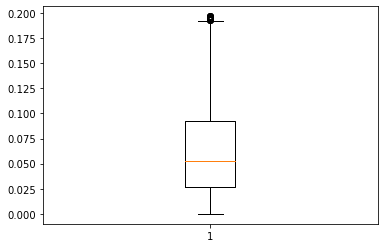

In [158]:
plt.boxplot(wt_outliers.Item_Visibility)
plt.show()

## If Data have both Inliers and Outliers 


**finalsales[~((finalsales.Item_Outlet_Sales<q1-1.5*iqr) | (finalsales.Item_Outlet_Sales<q3+1.5*iqr))]**

## Outlier removal using standard normal distribution

****Rule is that any value or set of values is less than 3 sigma or more than 3 sigma is considered to be an outlier****

**1. Apply standard scalar so that we can get the Z score values**

**2. Apply the condition of <=3 and >=3 Sigma**

**3. Extract the data frame with no lesser outliers**

In [167]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [169]:
scale_data=pd.DataFrame(sc.fit_transform(pd.DataFrame(finalsales.Item_Outlet_Sales)), columns=['Item_Outlet_Sales'])

In [175]:
df=scale_data[~((scale_data.Item_Outlet_Sales<-3) | (scale_data.Item_Outlet_Sales>3))]

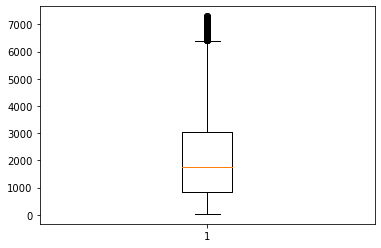

In [176]:
plt.boxplot(sc.inverse_transform(df))
plt.show()

In [178]:
pd.DataFrame(sc.inverse_transform(df)).describe()

,0
count,8433.000000
mean,2114.297126
std,1582.783405
min,33.290000
25%,822.263000
50%,1768.364800
75%,3056.022000
max,7298.499600


In [179]:
from sklearn.model_selection import train_test_split 

In [181]:
x = finalsales.drop('Item_Outlet_Sales',axis=1)
y = finalsales.Item_Outlet_Sales

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= 0.20)